# Goal

****The main questions of interest for this project are:****

****1. Build a predictive model that can accurately identify customers who are at risk of leaving the company (churn) based on the provided variables. This can help the company take proactive steps to retain these customers and reduce the rate of churn.****

****2.  Perform a thorough exploratory analysis of the provided customer data to gain insights into the behavior and characteristics of the customers. This includes analyzing patterns and trends in variables. This analysis can help the company understand its customers better and inform future decision-making.****

****Solution Plan:****

****Datasets Overview:****

Review the provided customer data to familiarize yourself with the variables and their structure.

Check the data quality, missing values, and potential errors.

Determine if any data pre-processing is necessary.

****Exploratory Analysis:****

Analyze the distribution of the variables to identify any outliers or anomalies.

Investigate the relationship between variables to identify any correlations or patterns.

Visualize the data to gain insights into the behavior and characteristics of the customers.

****Simple Data Cleaning & Feature Selection:****

Clean the data by handling missing values, converting variables to appropriate data types, and addressing any data quality issues.

Select the most important variables for building the predictive model.

****Machine Learning:****

Build a predictive model that can identify customers who are at risk of leaving the company.

# Datasets Overview

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_excel('output1.xlsx')
df.head(8)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
5,50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139.19
6,50007,1,NaN,Phone,3,11.0,Cash on Delivery,Male,2.0,3,Laptop & Accessory,2,Divorced,4,0,14.0,0.0,1.0,0.0,120.86
7,50008,1,NaN,Phone,1,6.0,CC,Male,3.0,3,Mobile,2,Divorced,3,1,16.0,2.0,2.0,0.0,122.93


In [14]:
df.columns
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


Let's take a look at unique values:

In [15]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(f'Unique values in column {col}: {df[col].unique()}')

Unique values in column PreferredLoginDevice: ['Mobile Phone' 'Phone' 'Computer']
Unique values in column PreferredPaymentMode: ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
Unique values in column Gender: ['Female' 'Male']
Unique values in column PreferedOrderCat: ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
Unique values in column MaritalStatus: ['Single' 'Divorced' 'Married']


# Exploratory Analysis

****1.1 Does the gender of a customer have a significant impact on their likelihood to churn?****

Understanding the impact of gender on churn can provide insights into the factors that influence customer satisfaction and loyalty. This information can help the company tailor their marketing and customer service strategies to better meet the needs of male and female customers.

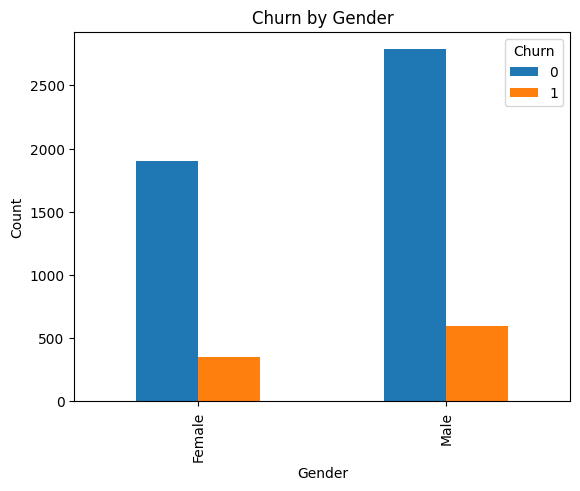

In [16]:
grouped = df.groupby(['Gender', 'Churn']).count()['CustomerID']

grouped.unstack().plot(kind='bar', stacked=False)

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Churn by Gender')

plt.show()

The chart above shows that the likelihood of churn by gender is very similar.

****1.2 Does a customer's tenure have a significant impact on their likelihood to churn?****

Knowing the relationship between tenure and churn can help the company identify which customers are most at risk of leaving, so they can take proactive measures to retain these customers. This information can also help the company to understand which customer segments are most valuable to their business and why.

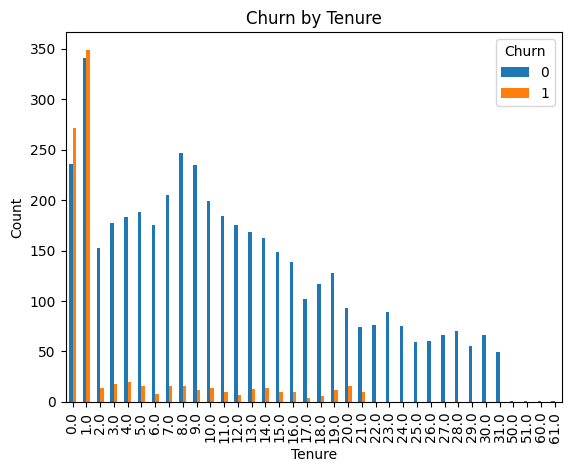

In [17]:
grouped = df.groupby(['Tenure', 'Churn']).count()['CustomerID']

# Plot the data
grouped.unstack().plot(kind='bar', stacked=False)

# Add labels and title to the plot
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.title('Churn by Tenure')

# Show the plot
plt.show()

It is notable that the possibility of churn occurs more easily with a lower tenure.

****1.3 Is there a significant relationship between a customer's preferred payment method and their likelihood to churn?****

Understanding the relationship between preferred payment method and churn can help the company identify any barriers to customer retention that may be related to the payment process. This information can be used to make improvements to the payment process and increase customer satisfaction, leading to reduced churn.

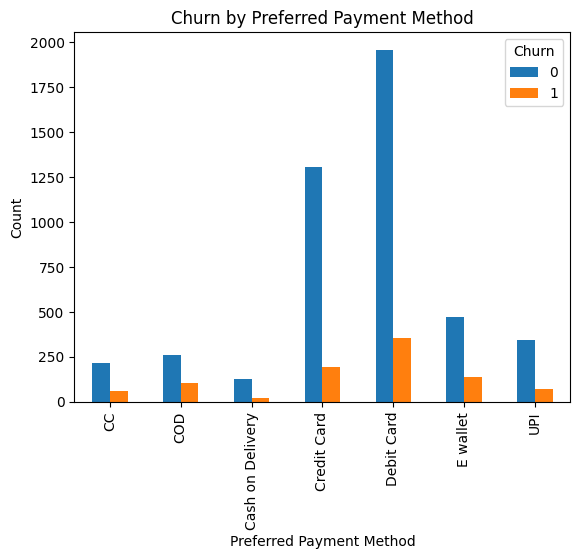

In [18]:
grouped = df.groupby(['PreferredPaymentMode', 'Churn']).count()['CustomerID']

# Plot the data
grouped.unstack().plot(kind='bar', stacked=False)

# Add labels and title to the plot
plt.xlabel('Preferred Payment Method')
plt.ylabel('Count')
plt.title('Churn by Preferred Payment Method')

# Show the plot
plt.show()

Customers who use credit cards and debit cards tend not to churn

# Data Cleaning & Feature Selection

****Handling missing values****

In [19]:
print(df.isnull().sum())

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64


In [20]:
df = df.fillna(df.mode().iloc[0])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5630 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5630 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5630 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

Impute missing values with the mode of each column

****Numerical Features****

Let's take a look at the correlation matrix:

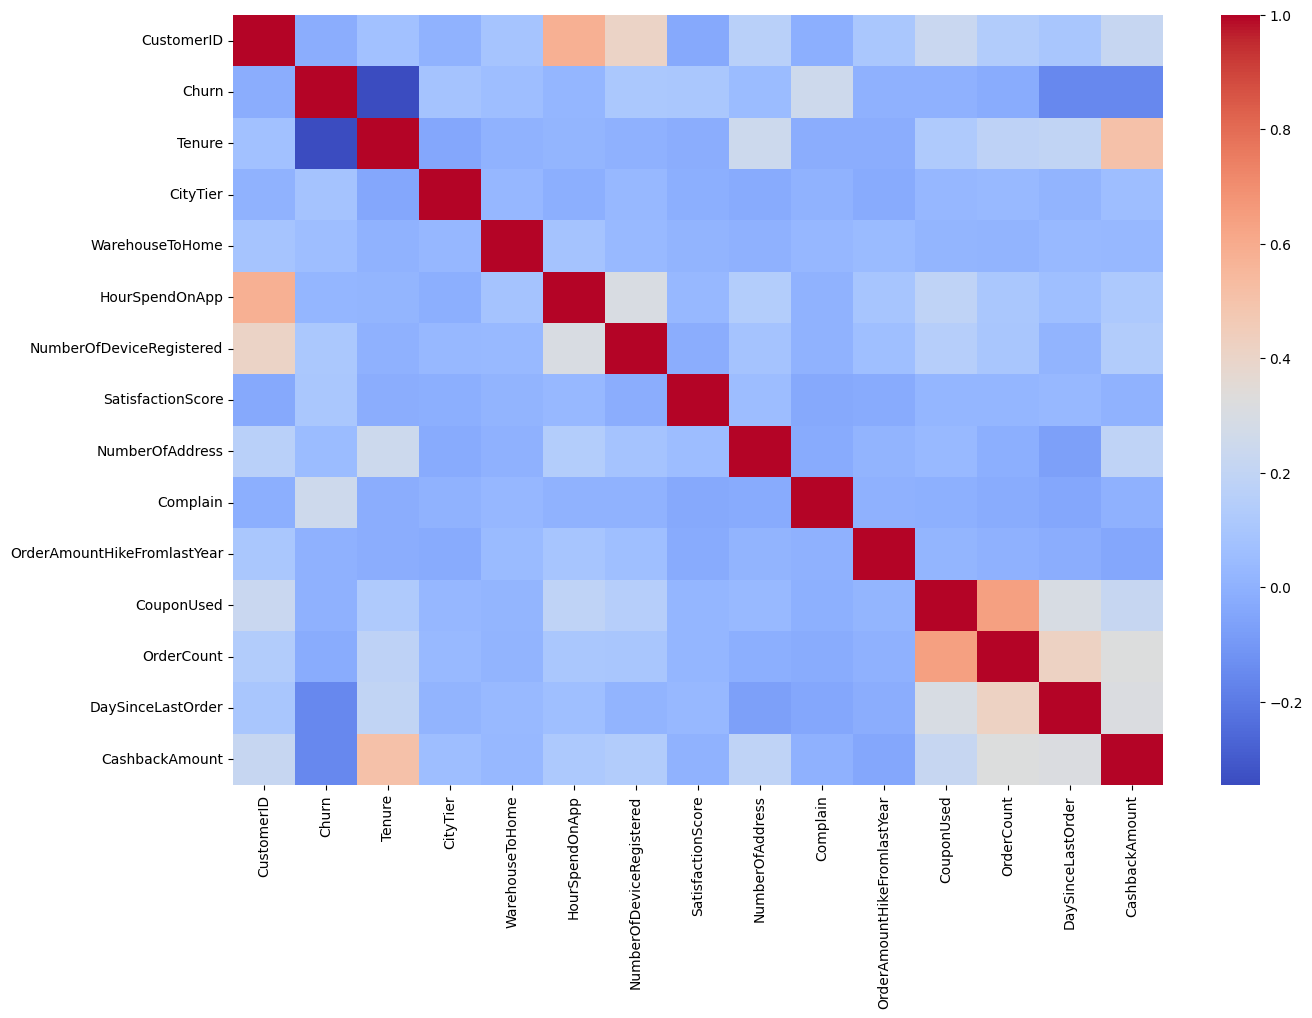

In [23]:
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(15, 10))
sns.heatmap(numeric_df.corr(), cmap='coolwarm')
plt.show()


The correlation matrix shows that coupon used, order count, days since last order, and cashback amount are positively correlated. This means that as the value of one variable increases, the value of the other variables is likely to increase as well. This could indicate that customers who use coupons, place more orders, have made their last order more recently, and receive a higher cashback amount are more likely to be active and engaged with the company.

On the other hand, tenure is negatively correlated with churn. This suggests that customers who have been with the company for a longer period of time are less likely to leave compared to those with shorter tenures. This could be due to increased loyalty and satisfaction with the company's products and services over time.

Eliminating irrelevant columns:

In [24]:
df = df.drop("CustomerID", axis=1)

****Categorical Features****

The chi-square test can be used in feature selection to check the dependence between two categorical variables.

In [25]:
from scipy.stats import chi2_contingency

cat_features = df.select_dtypes(include=['object']).columns

for feature in cat_features:
    cross_tab = pd.crosstab(df[feature], df['Churn'])
    stat, p, dof, expected = chi2_contingency(cross_tab)
    print(f"{feature}: Chi-square Statistic = {stat}, p-value = {p}")
    
    alpha = 0.05
    if p > alpha:
        print(f"{feature} is NOT significantly related to churn")
    else:
        print(f"{feature} is significantly related to churn")

PreferredLoginDevice: Chi-square Statistic = 73.53679418373687, p-value = 1.0756922373255215e-16
PreferredLoginDevice is significantly related to churn
PreferredPaymentMode: Chi-square Statistic = 77.89682023026812, p-value = 9.708708511076305e-15
PreferredPaymentMode is significantly related to churn
Gender: Chi-square Statistic = 4.662908495367532, p-value = 0.03082094033489009
Gender is significantly related to churn
PreferedOrderCat: Chi-square Statistic = 288.63939355672443, p-value = 2.7708325346337454e-60
PreferedOrderCat is significantly related to churn
MaritalStatus: Chi-square Statistic = 188.6710396770566, p-value = 1.073011277910542e-41
MaritalStatus is significantly related to churn


The results of the chi-square test show that the PreferredLoginDevice, PreferredPaymentMode, Gender, PreferedOrderCat, and MaritalStatus features are all significantly related to churn. The p-values for each feature are well below the threshold of 0.05, indicating that there is a statistically significant relationship between each of these features and churn.

The PreferredLoginDevice feature has the highest chi-square statistic value, suggesting that the choice of login device is highly related to churn. Similarly, the PreferredPaymentMode feature also has a high chi-square statistic value, indicating that the choice of payment mode is also significantly related to churn.

Gender, PreferedOrderCat, and MaritalStatus also have significant chi-square statistic values and p-values, suggesting that these features also play a role in determining churn. These results highlight the importance of considering the effects of demographic factors, such as gender and marital status, as well as customer preferences, such as login device and payment mode, when analyzing churn.

Converting the categorical features into dummy variables:

In [26]:
df= pd.get_dummies(df, columns=df.select_dtypes(['object']).columns)

Now the dataset is ready, let's go to modeling

# Machine Learning

In [27]:
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1) 
y = df['Churn'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [28]:
y_train.value_counts()

Churn
0    3743
1     761
Name: count, dtype: int64

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test=sc.transform(X_test)

****Model 1: Logistic Regression on churn****

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
lr_clf = LogisticRegression(random_state = 0)
lr_clf.fit(X_train, y_train)

y_train_pred = lr_clf.predict(X_train)
y_test_pred = lr_clf.predict(X_test)

# Calculate metrics for the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

# Calculate metrics for the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Print results
print('Training Set Metrics:')
print(f'Accuracy: {train_accuracy}')
print(f'Precision: {train_precision}')
print(f'Recall: {train_recall}')
print(f'F1 Score: {train_f1}')

print('\nTest Set Metrics:')
print(f'Accuracy: {test_accuracy}')
print(f'Precision: {test_precision}')
print(f'Recall: {test_recall}')
print(f'F1 Score: {test_f1}')

Training Set Metrics:
Accuracy: 0.8987566607460036
Precision: 0.8922759879290555
Recall: 0.8987566607460036
F1 Score: 0.8914914381222301

Test Set Metrics:
Accuracy: 0.8854351687388987
Precision: 0.875874256512371
Recall: 0.8854351687388987
F1 Score: 0.87450623540538


****Model 2: Naive Bayes on churn****

In [35]:
from sklearn.naive_bayes import GaussianNB
nb_clf= GaussianNB()
nb_clf.fit(X_train, y_train)



y_train_pred = nb_clf.predict(X_train)
y_test_pred = nb_clf.predict(X_test)

# Calculate metrics for the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

# Calculate metrics for the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Print results
print('Training Set Metrics:')
print(f'Accuracy: {train_accuracy}')
print(f'Precision: {train_precision}')
print(f'Recall: {train_recall}')
print(f'F1 Score: {train_f1}')

print('\nTest Set Metrics:')
print(f'Accuracy: {test_accuracy}')
print(f'Precision: {test_precision}')
print(f'Recall: {test_recall}')
print(f'F1 Score: {test_f1}')

Training Set Metrics:
Accuracy: 0.7506660746003553
Precision: 0.835642257395389
Recall: 0.7506660746003553
F1 Score: 0.7769151273717138

Test Set Metrics:
Accuracy: 0.7468916518650088
Precision: 0.8189318180237807
Recall: 0.7468916518650088
F1 Score: 0.7716600113439898


****Model 3: RandomForestClassifier on churn****

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=10, random_state=0)
rf_clf.fit(X_train, y_train)

y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

# Calculate metrics for the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

# Calculate metrics for the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Print results
print('Training Set Metrics:')
print(f'Accuracy: {train_accuracy}')
print(f'Precision: {train_precision}')
print(f'Recall: {train_recall}')
print(f'F1 Score: {train_f1}')

print('\nTest Set Metrics:')
print(f'Accuracy: {test_accuracy}')
print(f'Precision: {test_precision}')
print(f'Recall: {test_recall}')
print(f'F1 Score: {test_f1}')

Accuracy on training set: 0.9980017761989343
Accuracy on test set: 0.9458259325044405
Training Set Metrics:
Accuracy: 0.9980017761989343
Precision: 0.9980065693796938
Recall: 0.9980017761989343
F1 Score: 0.9979970327690557

Test Set Metrics:
Accuracy: 0.9458259325044405
Precision: 0.9460248992106184
Recall: 0.9458259325044405
F1 Score: 0.9425940348807688


****Model 4: Decision Tree on churn****

In [39]:
from sklearn.tree import DecisionTreeClassifier
dec_clf = DecisionTreeClassifier()
dec_clf.fit(X_train, y_train)

print('Accuracy on training set:',dec_clf.score(X_train, y_train))
print('Accuracy on test set:',dec_clf.score(X_test, y_test))

y_train_pred = dec_clf.predict(X_train)
y_test_pred = dec_clf.predict(X_test)

# Calculate metrics for the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

# Calculate metrics for the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Print results
print('Training Set Metrics:')
print(f'Accuracy: {train_accuracy}')
print(f'Precision: {train_precision}')
print(f'Recall: {train_recall}')
print(f'F1 Score: {train_f1}')

print('\nTest Set Metrics:')
print(f'Accuracy: {test_accuracy}')
print(f'Precision: {test_precision}')
print(f'Recall: {test_recall}')
print(f'F1 Score: {test_f1}')

Accuracy on training set: 1.0
Accuracy on test set: 0.9547069271758437
Training Set Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Test Set Metrics:
Accuracy: 0.9547069271758437
Precision: 0.9544357752338548
Recall: 0.9547069271758437
F1 Score: 0.9545599204223294


Advantages and disadvantages of Decision Tree:

Advantages:

Decision Trees are easy to interpret and explain.
They can handle non-linear relationships between variables and can capture complex interactions.
They are computationally fast, making them an efficient algorithm.

Disadvantages:

Decision Trees can easily overfit the data and may not generalize well to new data.
They are not good for continuous variables, and can be sensitive to small changes in the data.

Based on the accuracy results, the Decision Tree algorithm performed well on the test set, with an accuracy of 0.9547. However, it's important to consider the potential drawbacks, such as overfitting and sensitivity to small changes in the data, when choosing the best algorithm for a given problem.

# Conclusion

In conclusion, the results of this project show that various factors, such as coupon usage, order count, days since last order, cashback amount, tenure, login device, payment mode, gender, order category, and marital status, are related to customer churn. The findings of the correlation matrix and chi-square test indicate that these factors can play a significant role in determining churn and that they should be considered when analyzing customer behavior.

The RandomForestClassifier and decision tree models showed good accuracy results, with the decision tree model achieving a higher accuracy score on the test set. These results suggest that using machine learning models can be an effective method for predicting customer churn.

The results of this project have practical implications for the company's financial performance. By better understanding the factors that contribute to customer churn, the company can take proactive measures to reduce churn and retain valuable customers. This can lead to increased customer loyalty, repeat business, and ultimately, improved financial performance.

The findings of this project can be translated into financial results in the following ways:

-Reducing Churn: By identifying the factors that contribute to customer churn, the company can take steps to reduce it. This can lead to increased customer retention and repeat business, which can result in increased revenue for the company.

-Improving Customer Loyalty: By understanding the factors that influence customer churn, the company can take steps to improve customer loyalty. This can result in higher customer lifetime value, as loyal customers are more likely to make repeat purchases.

-Increased Efficiency: By using machine learning models to predict customer churn, the company can target its retention efforts more effectively. This can lead to increased efficiency in retention efforts and a more focused use of resources, which can result in cost savings for the company.